This notebook is the part of exercise for mastering the art of Data Science and Machine Learning. This is based from a book called Data Science Projects with Python, authored by Stephen Klosterman.

The data used in this notebook is sourced from https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients. But, the data used below is splitted into 30k rows, much smaller than the original data.

**The Storyline**

A client, credit card company, brought a dataset that includes some demographics and recent financial data of over past 6 month, for a sample of 30,000 of their account holder. This data is at the credit account level. The goal is develop a predictive model for wether the account will default next month, given the demographic and historical data.

In [64]:
import pandas as pd

In [65]:
# Loading the dataset
df = pd.read_excel('/content/default_of_credit_card_clients__courseware_version_1_21_19.xls')

df.sample(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
9693,451f0b4f-c651,210000,2,3,2,36,0,0,0,0,...,63322,73433,75381,6549,4500,2407,12700,3200,4000,0
11419,ff8b5816-9f9c,50000,2,2,1,57,-1,-1,-1,-2,...,0,0,0,274,0,0,0,0,2590,0
17386,43f3ea0f-15ed,20000,2,2,2,48,Not available,3,2,2,...,17708,18121,17692,0,300,2000,1000,0,792,1
16497,17792277-e568,20000,1,2,2,26,1,3,2,2,...,19621,18646,19022,1000,0,3300,0,1200,700,0
13264,914f4852-2a7a,50000,2,2,2,23,0,0,0,0,...,44388,46528,44986,3000,3500,2500,3000,0,3500,0
29461,c02b0c80-156a,50000,1,5,2,27,0,0,0,0,...,15735,0,0,6143,2354,4147,0,0,0,0
23408,b2c5a7c8-b1b2,50000,2,2,2,48,1,4,3,2,...,9075,10037,12503,0,0,0,1000,0,264,0
13984,93a81dd7-33d2,150000,2,1,1,40,Not available,0,0,0,...,146328,148012,151014,6000,10031,4630,4918,9000,5104,0
21967,38d3abf3-4939,120000,2,2,2,28,0,0,0,0,...,0,0,0,1621,1000,1326,0,0,0,0
11640,f9e11fbd-01ab,80000,2,2,2,27,0,0,0,0,...,60169,58426,58204,3000,3923,2500,2100,2200,2075,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

Based on the information above, we know the data has 25 columns.

**Data Dictionary:**
- **LIMIT_BAL**: Amount of credit provided (Taiwanese Dollar) including individual cunsomer credit and the family (suplementary) credit.
- **SEX**: 1 = male, 2 = female
- **EDUCATION**: 1=graduate school, 2=university, 3=high school, 4=other
- **MARRIAGE**: 1=married, 2=single, 3=other
- **AGE**: Age (num)
- **PAY1-PAY-6**: Record of the past payments. Past monthly payments, recorded form April to September, stored in this column
- **PAY_n**: Represent the repayment status, 1 is September, and 6 is April. The measure scale is -1=pay duly; 1=delay for 1 month to 9=delay for 9 month, and above.
- **BILL_AMT1-BILL_AMT6**: Bill statement amount (in Taiwanese Dollar)
- **BILL_AMTn**: Represent the month of bill amount. 1 in September, to 6 for April.
- **PAY_AMT1-PAY_AMT6**: Amount of previous payment (in Taiwanese Dollar). PAY_AMT 1 represent amount paid in September, to PAY_AMT2 represent amount paid in April.


In [67]:
df['PAY_1'].value_counts()

,count
PAY_1,
0,13402
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


Now I know the reason why PAY 1 column have object value. It has a value named 'Not Available', I still doesn't know wether this value should be converted into numerical or not.

In [68]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_1,0
PAY_2,0
PAY_3,0
PAY_4,0


There is no missing data.

In [69]:
df.shape

(30000, 25)

The data has 30.000 rows and 25 columns

In [70]:
df.nunique()

,0
ID,29687
LIMIT_BAL,82
SEX,3
EDUCATION,7
MARRIAGE,4
AGE,57
PAY_1,12
PAY_2,11
PAY_3,11
PAY_4,11


In [71]:
# Count ID
id_count = df['ID'].value_counts()
id_count.head()

,count
ID,
89f8f447-fca8,2
7c9b7473-cc2f,2
90330d02-82d9,2
75938fec-e5ec,2
2a793ecf-05c6,2


In [72]:
id_count.value_counts()

,count
count,
1,29374
2,313


It seems the ID column have duplicated value. We need to filter out those duplicated ID

**Data Cleaning**

In [73]:
# Locating the duplicated ID (this step is using boolean masking technique)
dupe_mask = id_count == 2
dupe_mask[:5]

,count
ID,
89f8f447-fca8,True
7c9b7473-cc2f,True
90330d02-82d9,True
75938fec-e5ec,True
2a793ecf-05c6,True


In [74]:
# Call first 5 row of index in id_count
id_count.index[:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

In [75]:
# Select the duplicated ID and save it to a new variable
dupe_id = id_count.index[dupe_mask]
dupe_id[:5]

Index(['89f8f447-fca8', '7c9b7473-cc2f', '90330d02-82d9', '75938fec-e5ec',
       '2a793ecf-05c6'],
      dtype='object', name='ID')

In [76]:
# Convert dupe_id into list
dupe_id = list(dupe_id)
len(dupe_id)

313

The length of the dupe_id list is same

In [77]:
dupe_id[:5]

['89f8f447-fca8',
 '7c9b7473-cc2f',
 '90330d02-82d9',
 '75938fec-e5ec',
 '2a793ecf-05c6']

In [78]:
# Find a row containing duplicated ID
df.loc[df['ID'].isin(dupe_id[0:3]),:]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15879,7c9b7473-cc2f,90000,2,1,1,29,0,0,0,0,...,27751,20292,14937,2967,2007,1429,1092,412,263,0
15979,7c9b7473-cc2f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29646,90330d02-82d9,70000,1,2,1,29,0,0,0,0,...,10694,27908,11192,2009,1404,3016,20001,2000,5002,0
29746,90330d02-82d9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The logic of code above is finding the duplicated id using first three ID's row in dupe_id. To pass the dupe_id list, .isin method is used, the function is to pass the dupe_id value to the df. The : in loc statement mean that the df column that have same value as dupe_id will be selected.

The finding is, the ID that is duplicated has two form, one has value, and one is not have value. Therefore, we need to delete the ID with no value.

In [79]:
# Boolean mask == 0
df_zero_mask = df == 0

In [80]:
# Feature series containing zero mask
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)

The logic from code above is to create Boolean Series, that identifies every row from the second row where all the values (exclude index (ID)) is 0. It used integer indexing (.iloc), the pass (:) to examine all rows and (1:) to examine all columns starting from second index (1). Then apply it to .all.

In [81]:
sum(feature_zero_mask)

315

It's surpising, there is 315 column containing 0 value (excluding first column). Needed to delete zeroed columns

In [82]:
# Clean the data by delete rows containing 0 value
df_clean_1 = df.loc[~feature_zero_mask,:].copy()

In [83]:
df_clean_1.shape

(29685, 25)

In [84]:
df_clean_1['ID'].nunique()

29685

From the result of the code above, we can conclude that all duplicated value has been cleaned. The total row of df_clean_1 is same as total unique value of ID.

**Exploring the Data**

In [85]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  int64 


Each column contain 29685 non-null value. All the value, except ID and PAY_1 column has int64 type of data. It's weird, we expect PAY_1 to have int64 type of data, not object. Need to check those peculiar column.

In [86]:
print(29685 - 3021)

26664


In [87]:
df_clean_1['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
Not available,3021
-2,2476
2,2378
3,292
4,63
5,23


There is unexpeted values, it is 0, -2, and a string 'Not available', maybe representing missing value. And why this column is imported as object value?



In [88]:
# Create a boolean mask to filter all rows that doesn't have missing data in PAY_1 feature
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

,PAY_1
0,True
1,True
2,True
3,True
4,True


In [89]:
sum(valid_pay_1_mask)

26664

The is 26664 rows that doesn't have 'Not available' value in PAY_1 column. It has valid value, checked by the subtraction between df_clean_1['PAY_1'] total rows - rows with 'Not available' value.

In [90]:
# Deleting PAY_1 rows that have 'Not available' value
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [91]:
df_clean_2.shape

(26664, 25)

In [92]:
df_clean_2['PAY_1'].value_counts()

,count
PAY_1,
0,13087
-1,5047
1,3261
-2,2476
2,2378
3,292
4,63
5,23
8,17


In [93]:
# Converting PAY_1 into int64
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26664 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          26664 non-null  object
 1   LIMIT_BAL                   26664 non-null  int64 
 2   SEX                         26664 non-null  int64 
 3   EDUCATION                   26664 non-null  int64 
 4   MARRIAGE                    26664 non-null  int64 
 5   AGE                         26664 non-null  int64 
 6   PAY_1                       26664 non-null  int64 
 7   PAY_2                       26664 non-null  int64 
 8   PAY_3                       26664 non-null  int64 
 9   PAY_4                       26664 non-null  int64 
 10  PAY_5                       26664 non-null  int64 
 11  PAY_6                       26664 non-null  int64 
 12  BILL_AMT1                   26664 non-null  int64 
 13  BILL_AMT2                   26664 non-null  int64 


The meaning of inconsistence value:
- **-2**: The account started that month with a zero balance and never used any credit
- **-1**: The account had a balance that was paid in full
- **0**: At least a minimum payment was made, but the entire balance wasn't paid (a positive balance was carried to the next month)

**Assuring Quality and Exploring the Data**

After further consulting with other department, we concluded that gender should not to be used as a parameter to predict credit-worthiness, because it's unethical.

We need to check the data distribution using histogram

In [94]:
# Import data visualization instrument
import matplotlib.pyplot as plt

# For render plotting automatically
%matplotlib inline

# Additional plotting functionality
import matplotlib as mpl

# For high resolution figure (dpi = dot per inch)
mpl.rcParams['figure.dpi'] = 400

array([[<Axes: title={'center': 'LIMIT_BAL'}>,
        <Axes: title={'center': 'AGE'}>]], dtype=object)

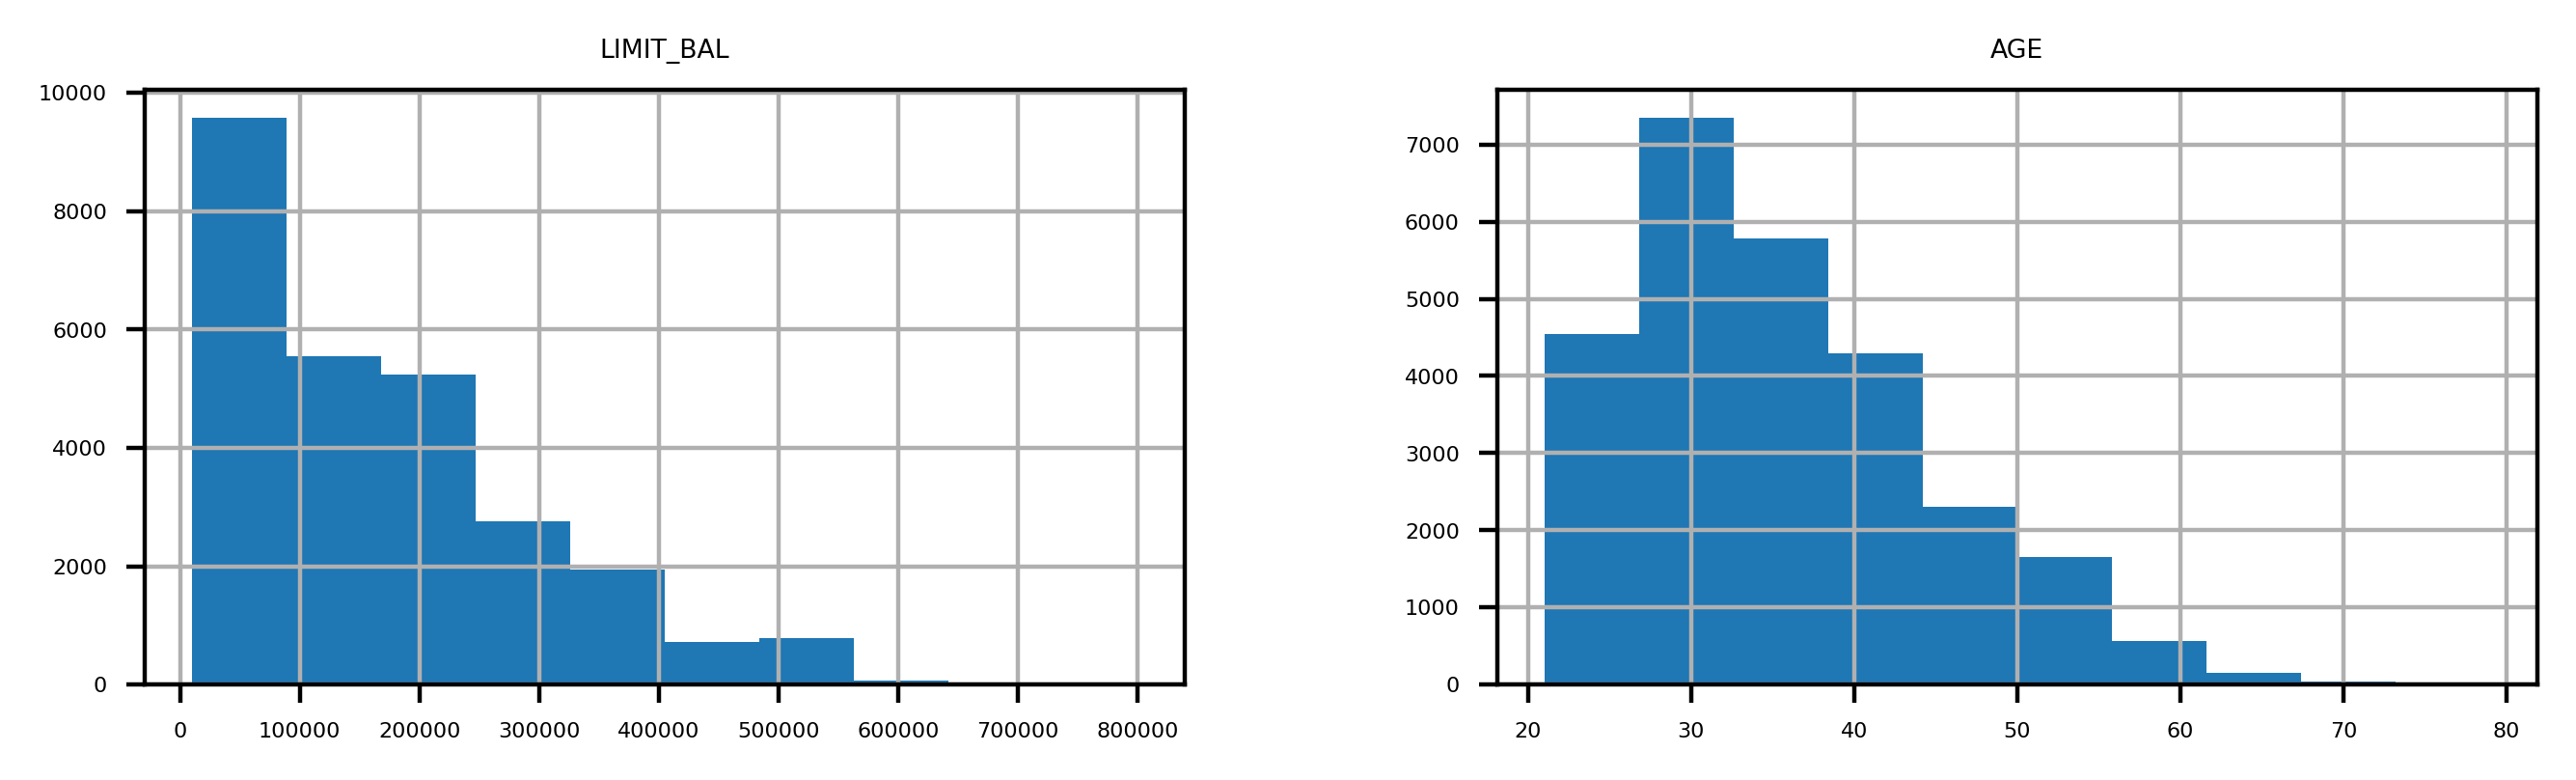

In [95]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist(figsize=(8,2))

In [96]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


**LIMIT BALL** have a minimum value of 10000 NT, this same as the standard. And the value must above 0. The data in this column is widely dispersed because of high standard deviation.

**Age** minimum is 21, this is correct because of minimum age is 21. And the age is reasonably distributed.

In [97]:
# Check EDUCATION value counts
df_clean_2['EDUCATION'].value_counts()

,count
EDUCATION,
2,12458
1,9412
3,4380
5,245
4,115
6,43
0,11


Reminder, (1 = graduate school; 2 = university; 3 = high school; 4 = others). There is undocumented data like 0, 5, and 6. What does this mean?

It seems our client will lump those undocumented data into others category because they are not very prevalent.

In [98]:
# Replacing undocumented value with value of 4, others
df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

/tmp/ipython-input-1361388279.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['EDUCATION'].replace(to_replace=[0,5,6], value=4, inplace=True)


,count
EDUCATION,
2,12458
1,9412
3,4380
4,414


Inplace=True is used to edit the existing dataframe. If the value is False, it will create a new dataframe.

In [99]:
# Checking the MARRIAGE value
df_clean_2['MARRIAGE'].value_counts()

,count
MARRIAGE,
2,14158
1,12172
3,286
0,48


For reminder (1 = married; 2 = single; 3 = other). There is undocumented value again, it's 0. We lump it into the value of 0 or others.

In [100]:
# Replace the 0 value in MARRIAGE column with 3
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

/tmp/ipython-input-3524824711.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)


,count
MARRIAGE,
2,14158
1,12172
3,334


Text(0.5, 0, 'Education level: ordinal encoding')

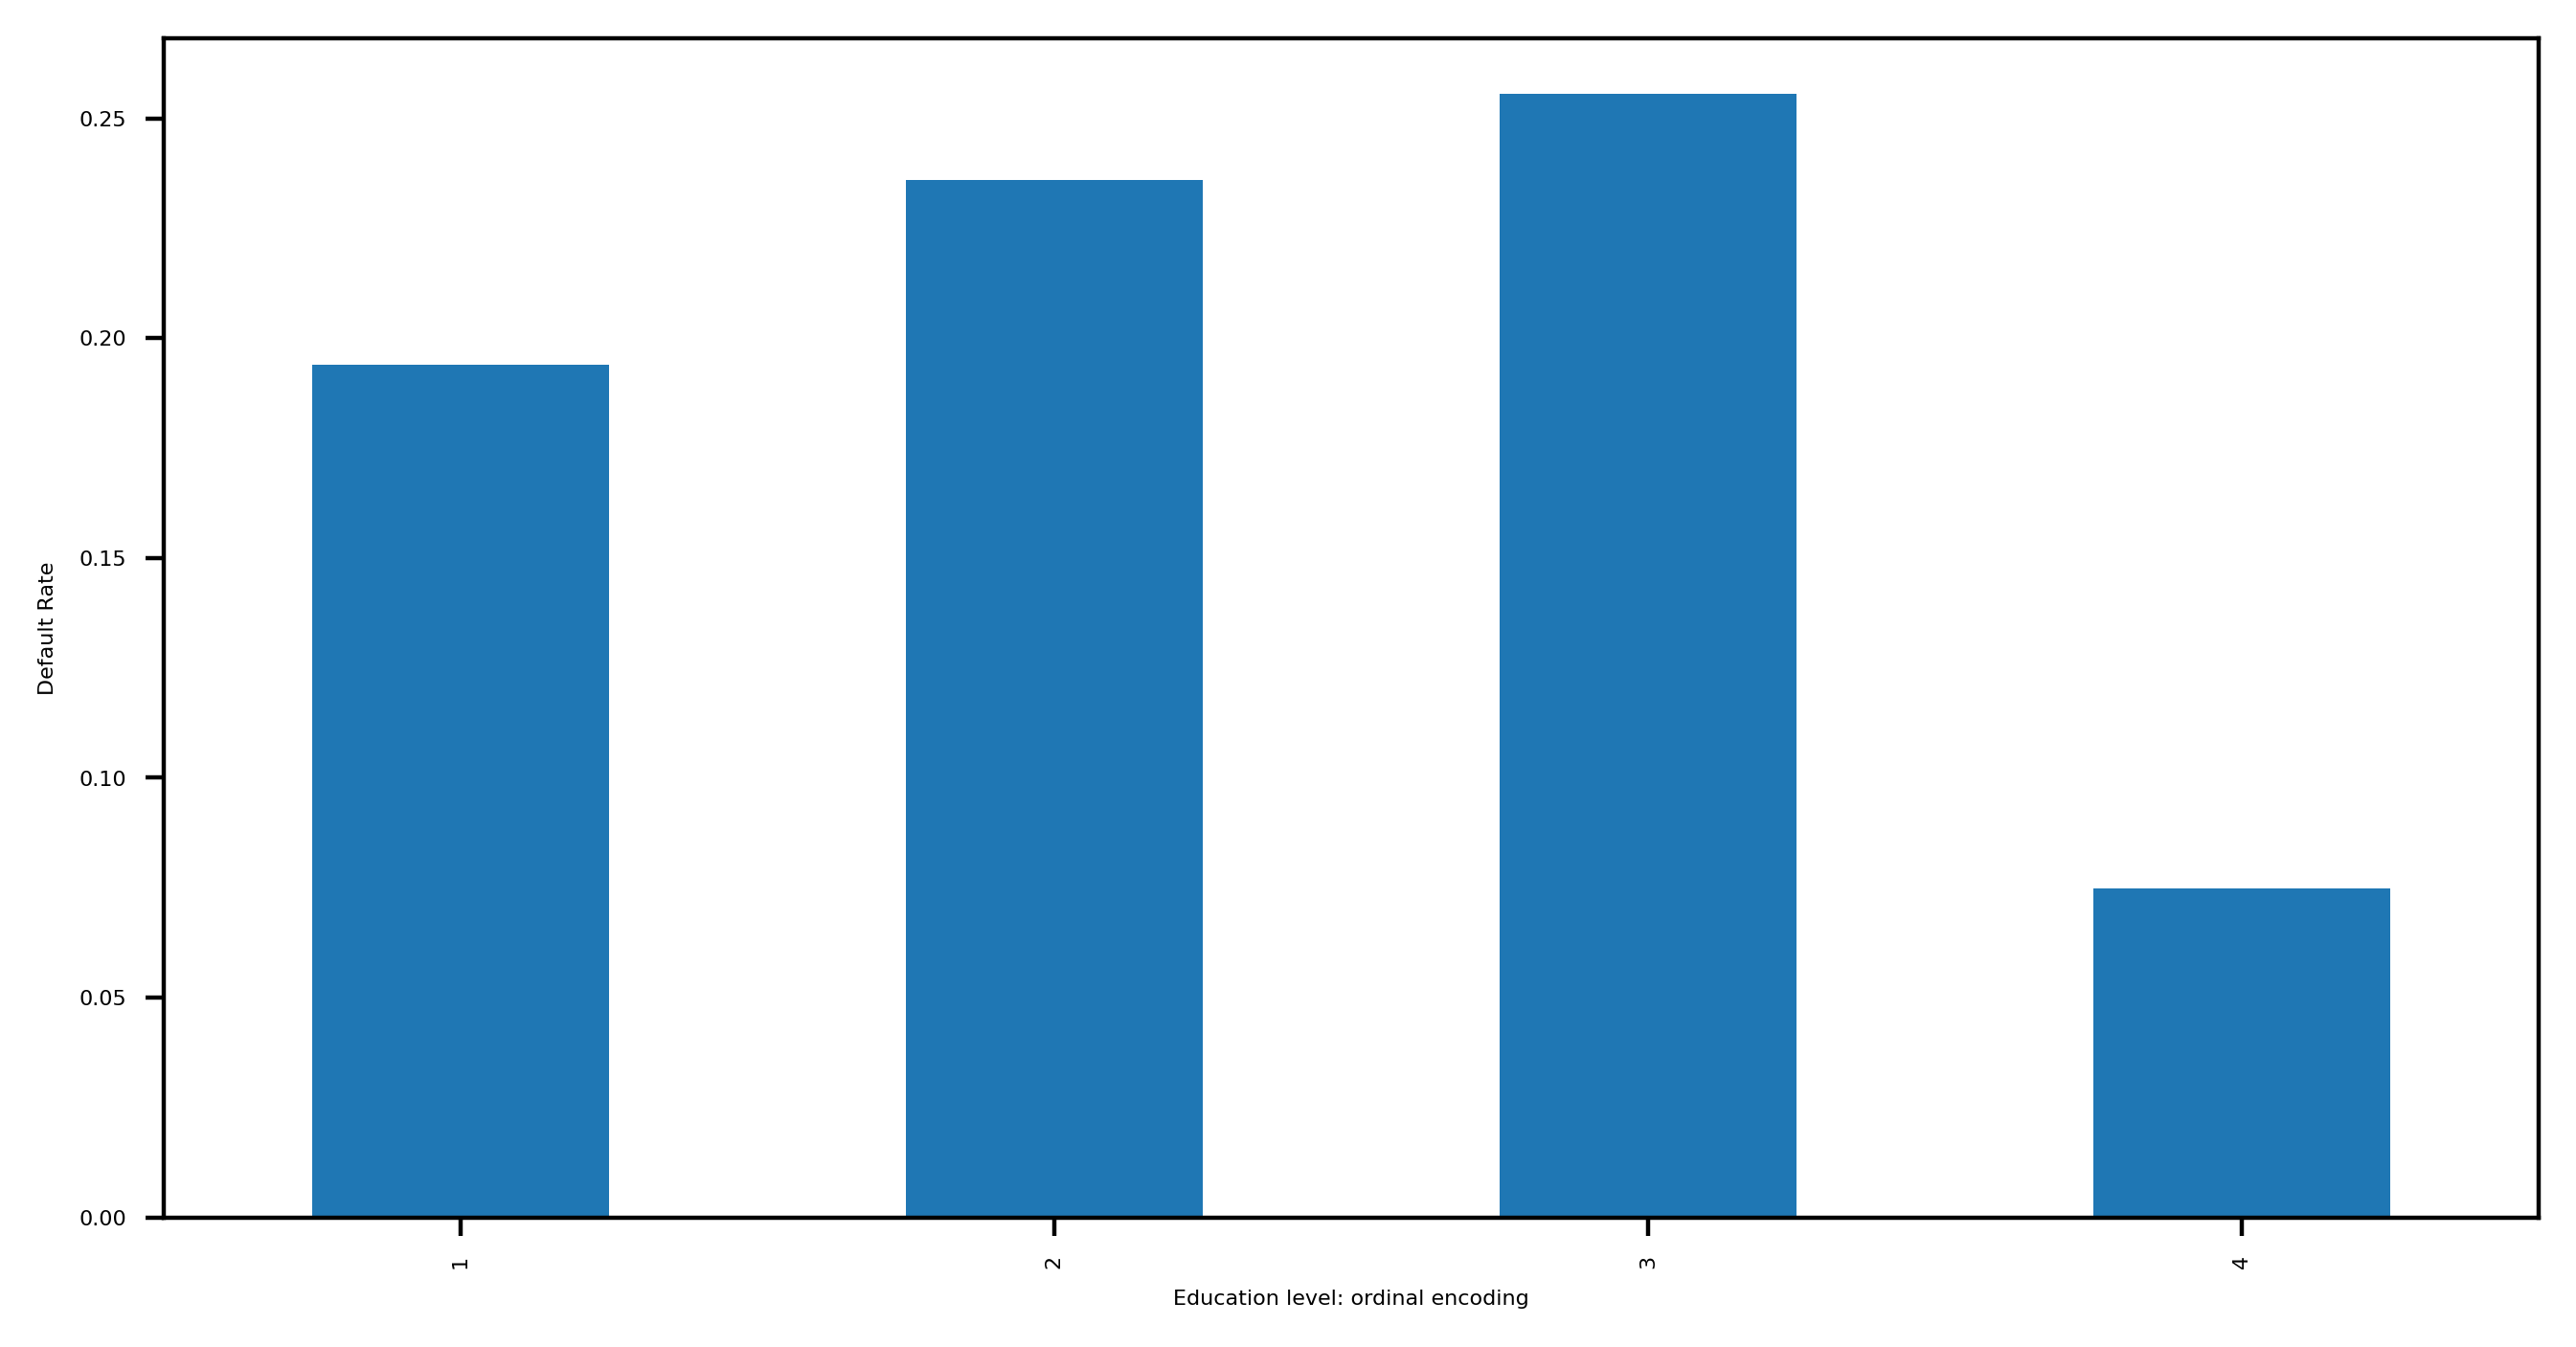

In [101]:
# Group the data based on EDUCATION and between each group aggregate the data together using the average of the default payment next month
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False, figsize=(8,4))
plt.ylabel('Default Rate')
plt.xlabel('Education level: ordinal encoding')

It seem the feature above has non-linear relationship. Need complex ML Algorithm like DT and RF. Or when we want to use linear model like logistic regression, we need to encode those value with one-hot encoding method.

It seems, our team agree that we should use linear model because we want to get higher interpretability for our team. So, first, we need to use one-hot encoding on the columns that have ordinal value.

In [102]:
# Create new column
df_clean_2['EDUCATION_CAT'] = 'none'

In [103]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [104]:
# Make a mapping to interpret ordinal value in EDUCATION
cat_mapping = {1: 'graduate school',
               2: 'university',
               3: 'high school',
               4: 'others'}

In [105]:
# Map EDUCATION and assign the value into EDUCATION_CAT column
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [106]:
# Make a one hot encoding based on EDUCATION_CAT column
edu_one_hot = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_one_hot.head(10)

,graduate school,high school,others,university
0,False,False,False,True
1,False,False,False,True
2,False,False,False,True
3,False,False,False,True
4,False,False,False,True
5,True,False,False,False
6,True,False,False,False
7,False,False,False,True
8,False,True,False,False
9,False,True,False,False


In [107]:
# Concat the edu_one_hot into main dataframe
main_df = pd.concat([df_clean_2, edu_one_hot], axis=1)
main_df[['EDUCATION_CAT', 'graduate school', 'high school', 'others', 'university']].head(10)

,EDUCATION_CAT,graduate school,high school,others,university
0,university,False,False,False,True
1,university,False,False,False,True
2,university,False,False,False,True
3,university,False,False,False,True
4,university,False,False,False,True
5,graduate school,True,False,False,False
6,graduate school,True,False,False,False
7,university,False,False,False,True
8,high school,False,True,False,False
9,high school,False,True,False,False


This one-hot encoding method is not work well with the data that have many ordinal features. We need to consider using other method when this happen.

**Exploring Financial History Features**

In [108]:
# Import (godsend) arithmetic instrument
import numpy as np

In [109]:
# Make a group of PAY_n features
pay_features = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
main_df[pay_features].describe()

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,-0.017777,-0.133363,-0.167679,-0.225023,-0.269764,-0.293579
std,1.126769,1.198640,1.199165,1.167897,1.131735,1.150229
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [110]:
main_df[pay_features[0]].value_counts().sort_index()

,count
PAY_1,
-2,2476
-1,5047
0,13087
1,3261
2,2378
3,292
4,63
5,23
6,11


This financial data dimension is relatively small, therefore, this device should run the algorithm properly. But, if the data dimension is high, we should do dimensionality reduction.

The data mainly distributed on the value of 0, -1, 1...

In [111]:
pay_1_bins = np.array(range(-2, 10)) - 0.5

The code above will specify bin edge location. The code will work by creating 12 array of number, which resulted in 11 bins, and each one will centered around 1 of the unique values of PAY_1

Text(0, 0.5, 'Number of Accounts')

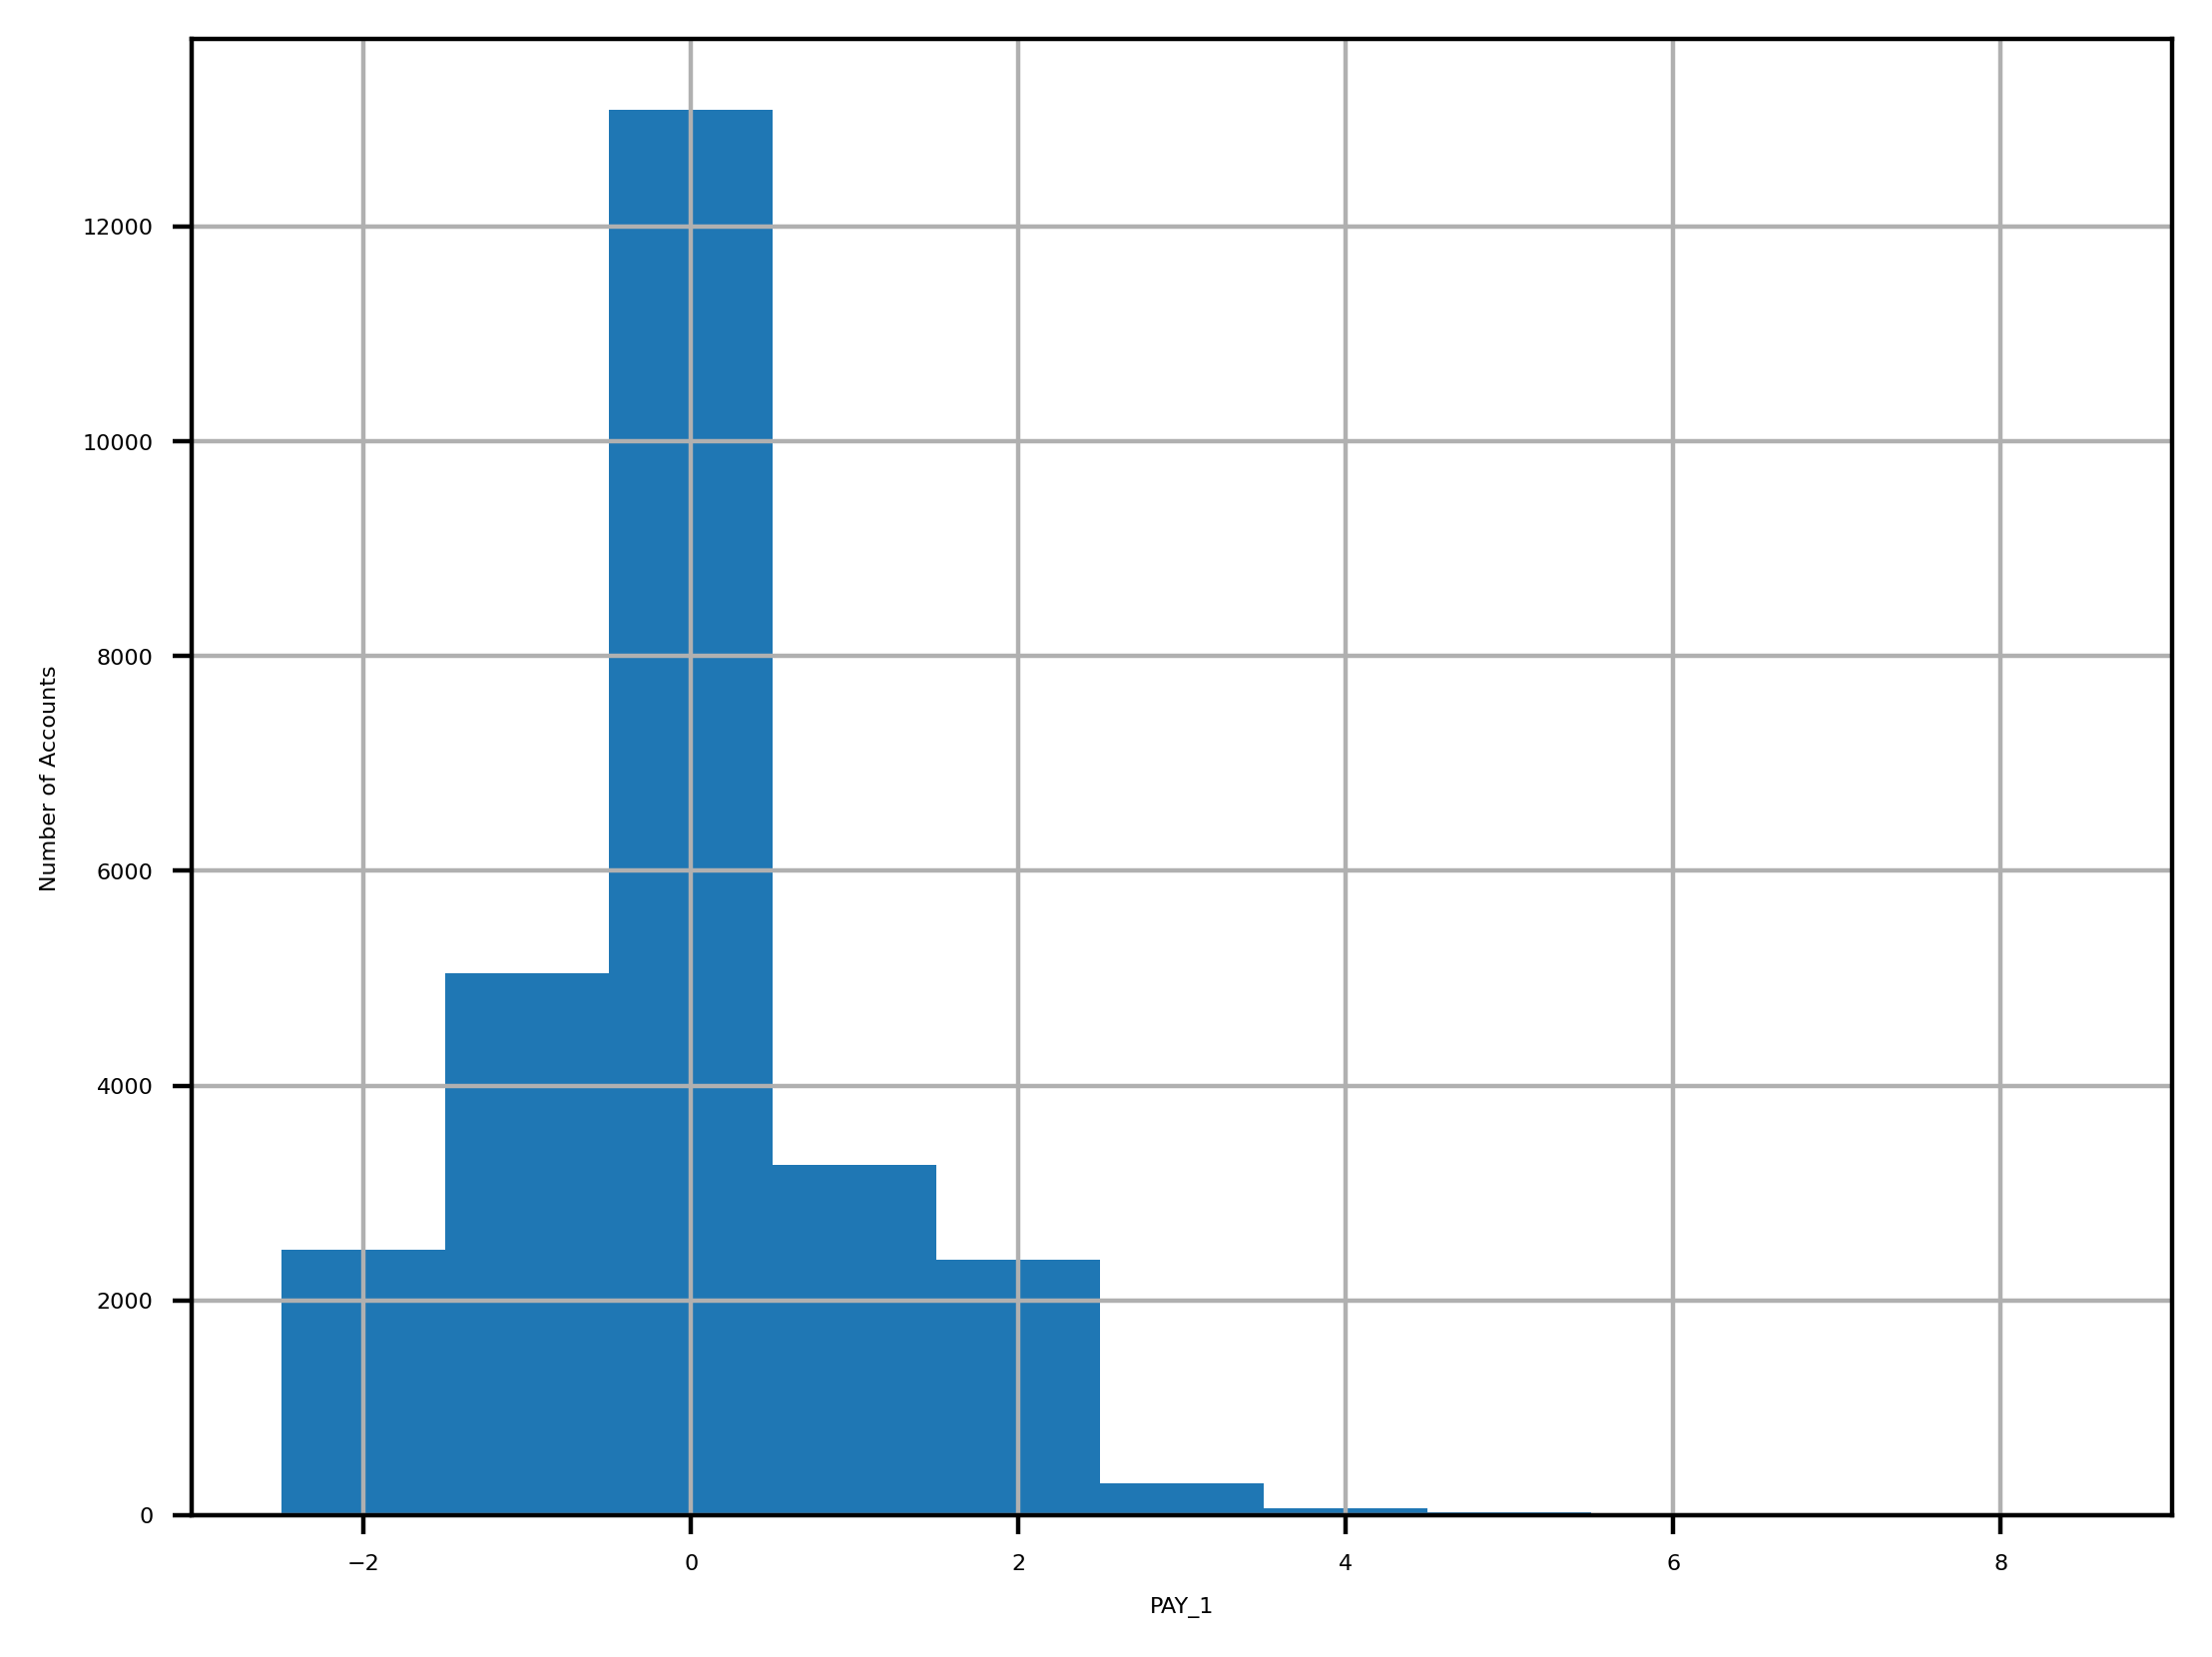

In [112]:
main_df[pay_features[0]].hist(bins=pay_1_bins)
plt.xlabel('PAY_1')
plt.ylabel('Number of Accounts')

Based on histogram above, the most account have a good track record (valued -2, -1, and 0). And for the months late, the value is decreased for each number of month got incremented.

array([[<Axes: title={'center': 'PAY_1'}>,
        <Axes: title={'center': 'PAY_2'}>,
        <Axes: title={'center': 'PAY_3'}>],
       [<Axes: title={'center': 'PAY_4'}>,
        <Axes: title={'center': 'PAY_5'}>,
        <Axes: title={'center': 'PAY_6'}>]], dtype=object)

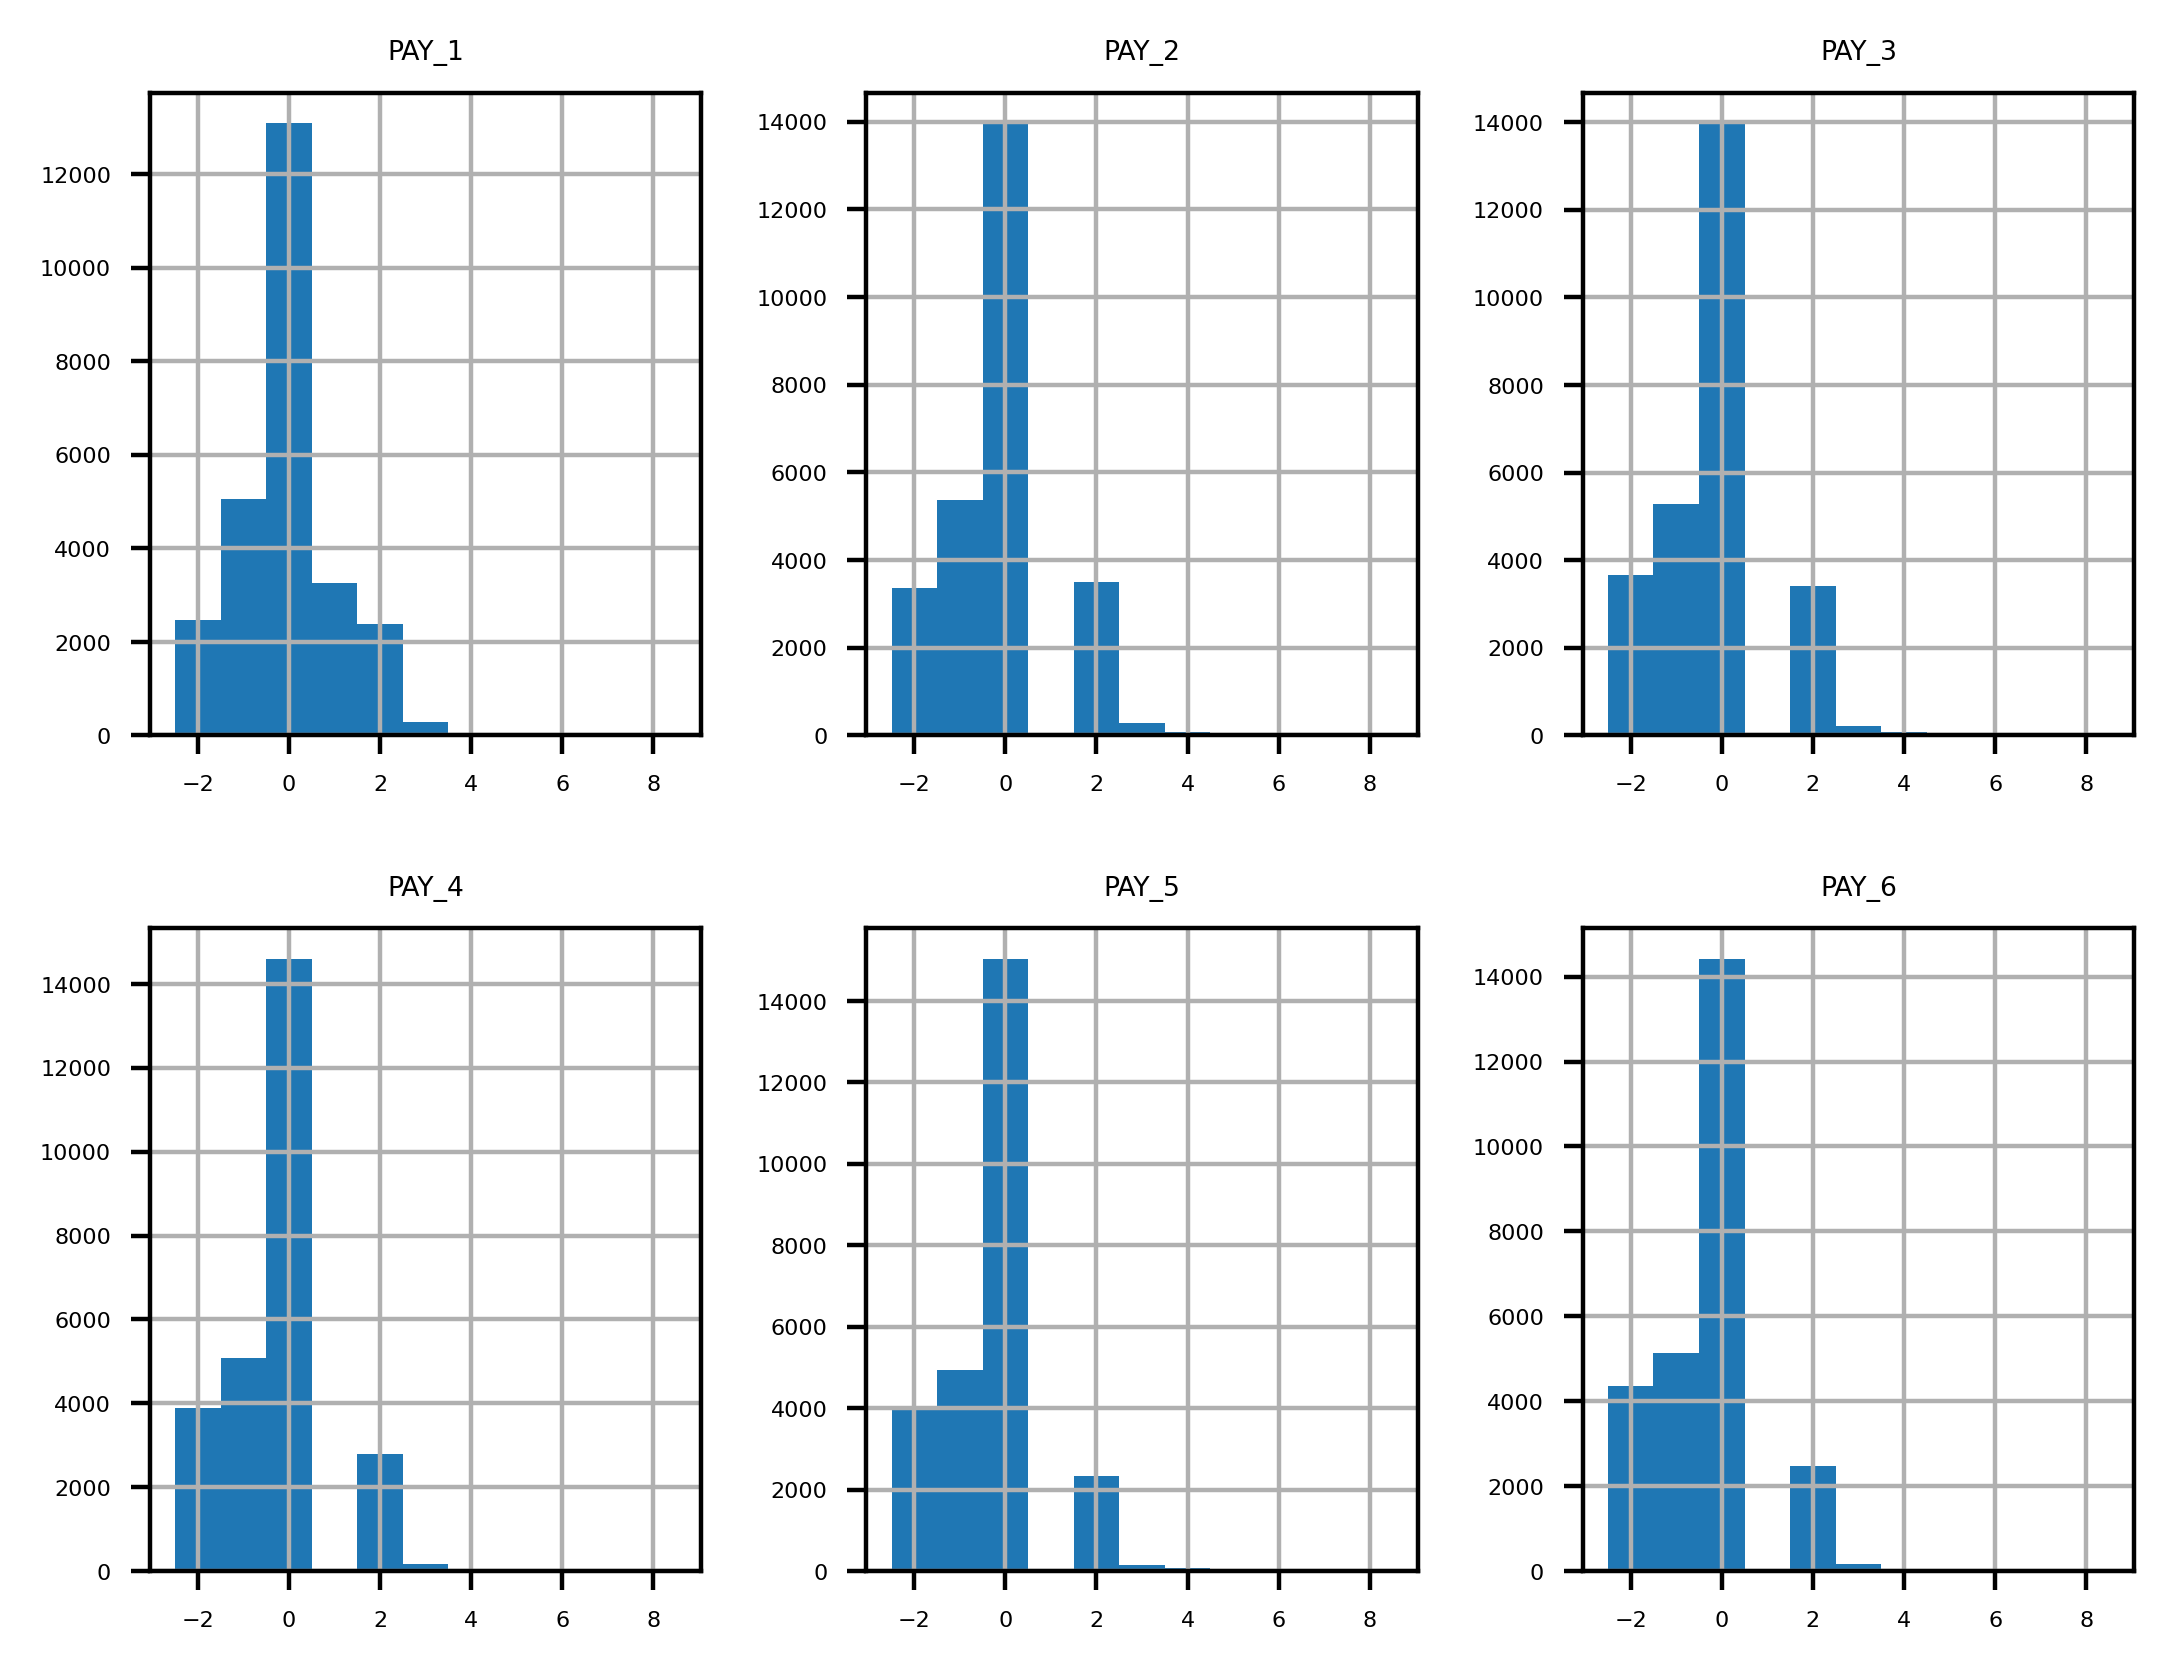

In [113]:
# Make a histplot for each PAY features
mpl.rcParams['font.size'] = 4
main_df[pay_features].hist(bins=pay_1_bins, layout=(2,3))

The trend is same, many people pay their bill early. But, there is null value of 1, but suddenly it rising on August (PAY_1). What exactly happened?

In [114]:
# Look at account with 2 month delay in August, and compare it with their payment status in July
main_df.loc[main_df['PAY_2'] == 2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


Based on table above, there is no indication of progress to a 2 month delay, that it only can be tracked from a 1 month delay by previous month. In the real case, you need to communicate with the data provider for a further clarity.

In this mock case, the client have a problem with pulling the most recent month of data, resulting in this faulty report for accounts that had a 1 month delay in their account. In September, they have fixed it, but not entirely, resulting missing value in PAY_1.

Because of this, only the most recent month of the recent payment data is correct. Therefore only PAY_1 can be used as a representative of a future data.

Thus, be careful with your data, partners!

**Bill and Pay Amount Features**

In [115]:
bill_features = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
pay_amt_features = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

There is two another features need to be unveiled, that is Bill Amount n and Pay Amount n features. The numbering is like Pay features, 1 representing September to 6 representing April.

In [116]:
main_df[bill_features].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000,26664.000000
mean,51405.730723,49300.001500,47026.340047,43338.894539,40338.136701,38889.872337
std,73633.687106,70934.549534,68705.359524,64275.250740,60705.944083,59432.541657
min,-165580.000000,-69777.000000,-157264.000000,-170000.000000,-81334.000000,-339603.000000
25%,3580.000000,2999.750000,2627.250000,2341.750000,1745.000000,1256.000000
50%,22361.000000,21150.000000,20079.500000,19037.000000,18066.000000,17005.000000
75%,67649.750000,64395.500000,60360.000000,54727.500000,50290.500000,49253.750000
max,746814.000000,671563.000000,855086.000000,706864.000000,823540.000000,699944.000000


By mean, we know that all the bill amount is increasing when the month pass by, (April to September). With the high value of standard deviation, we conclude that the data is widely dispersed.

array([[<Axes: title={'center': 'BILL_AMT1'}>,
        <Axes: title={'center': 'BILL_AMT2'}>,
        <Axes: title={'center': 'BILL_AMT3'}>],
       [<Axes: title={'center': 'BILL_AMT4'}>,
        <Axes: title={'center': 'BILL_AMT5'}>,
        <Axes: title={'center': 'BILL_AMT6'}>]], dtype=object)

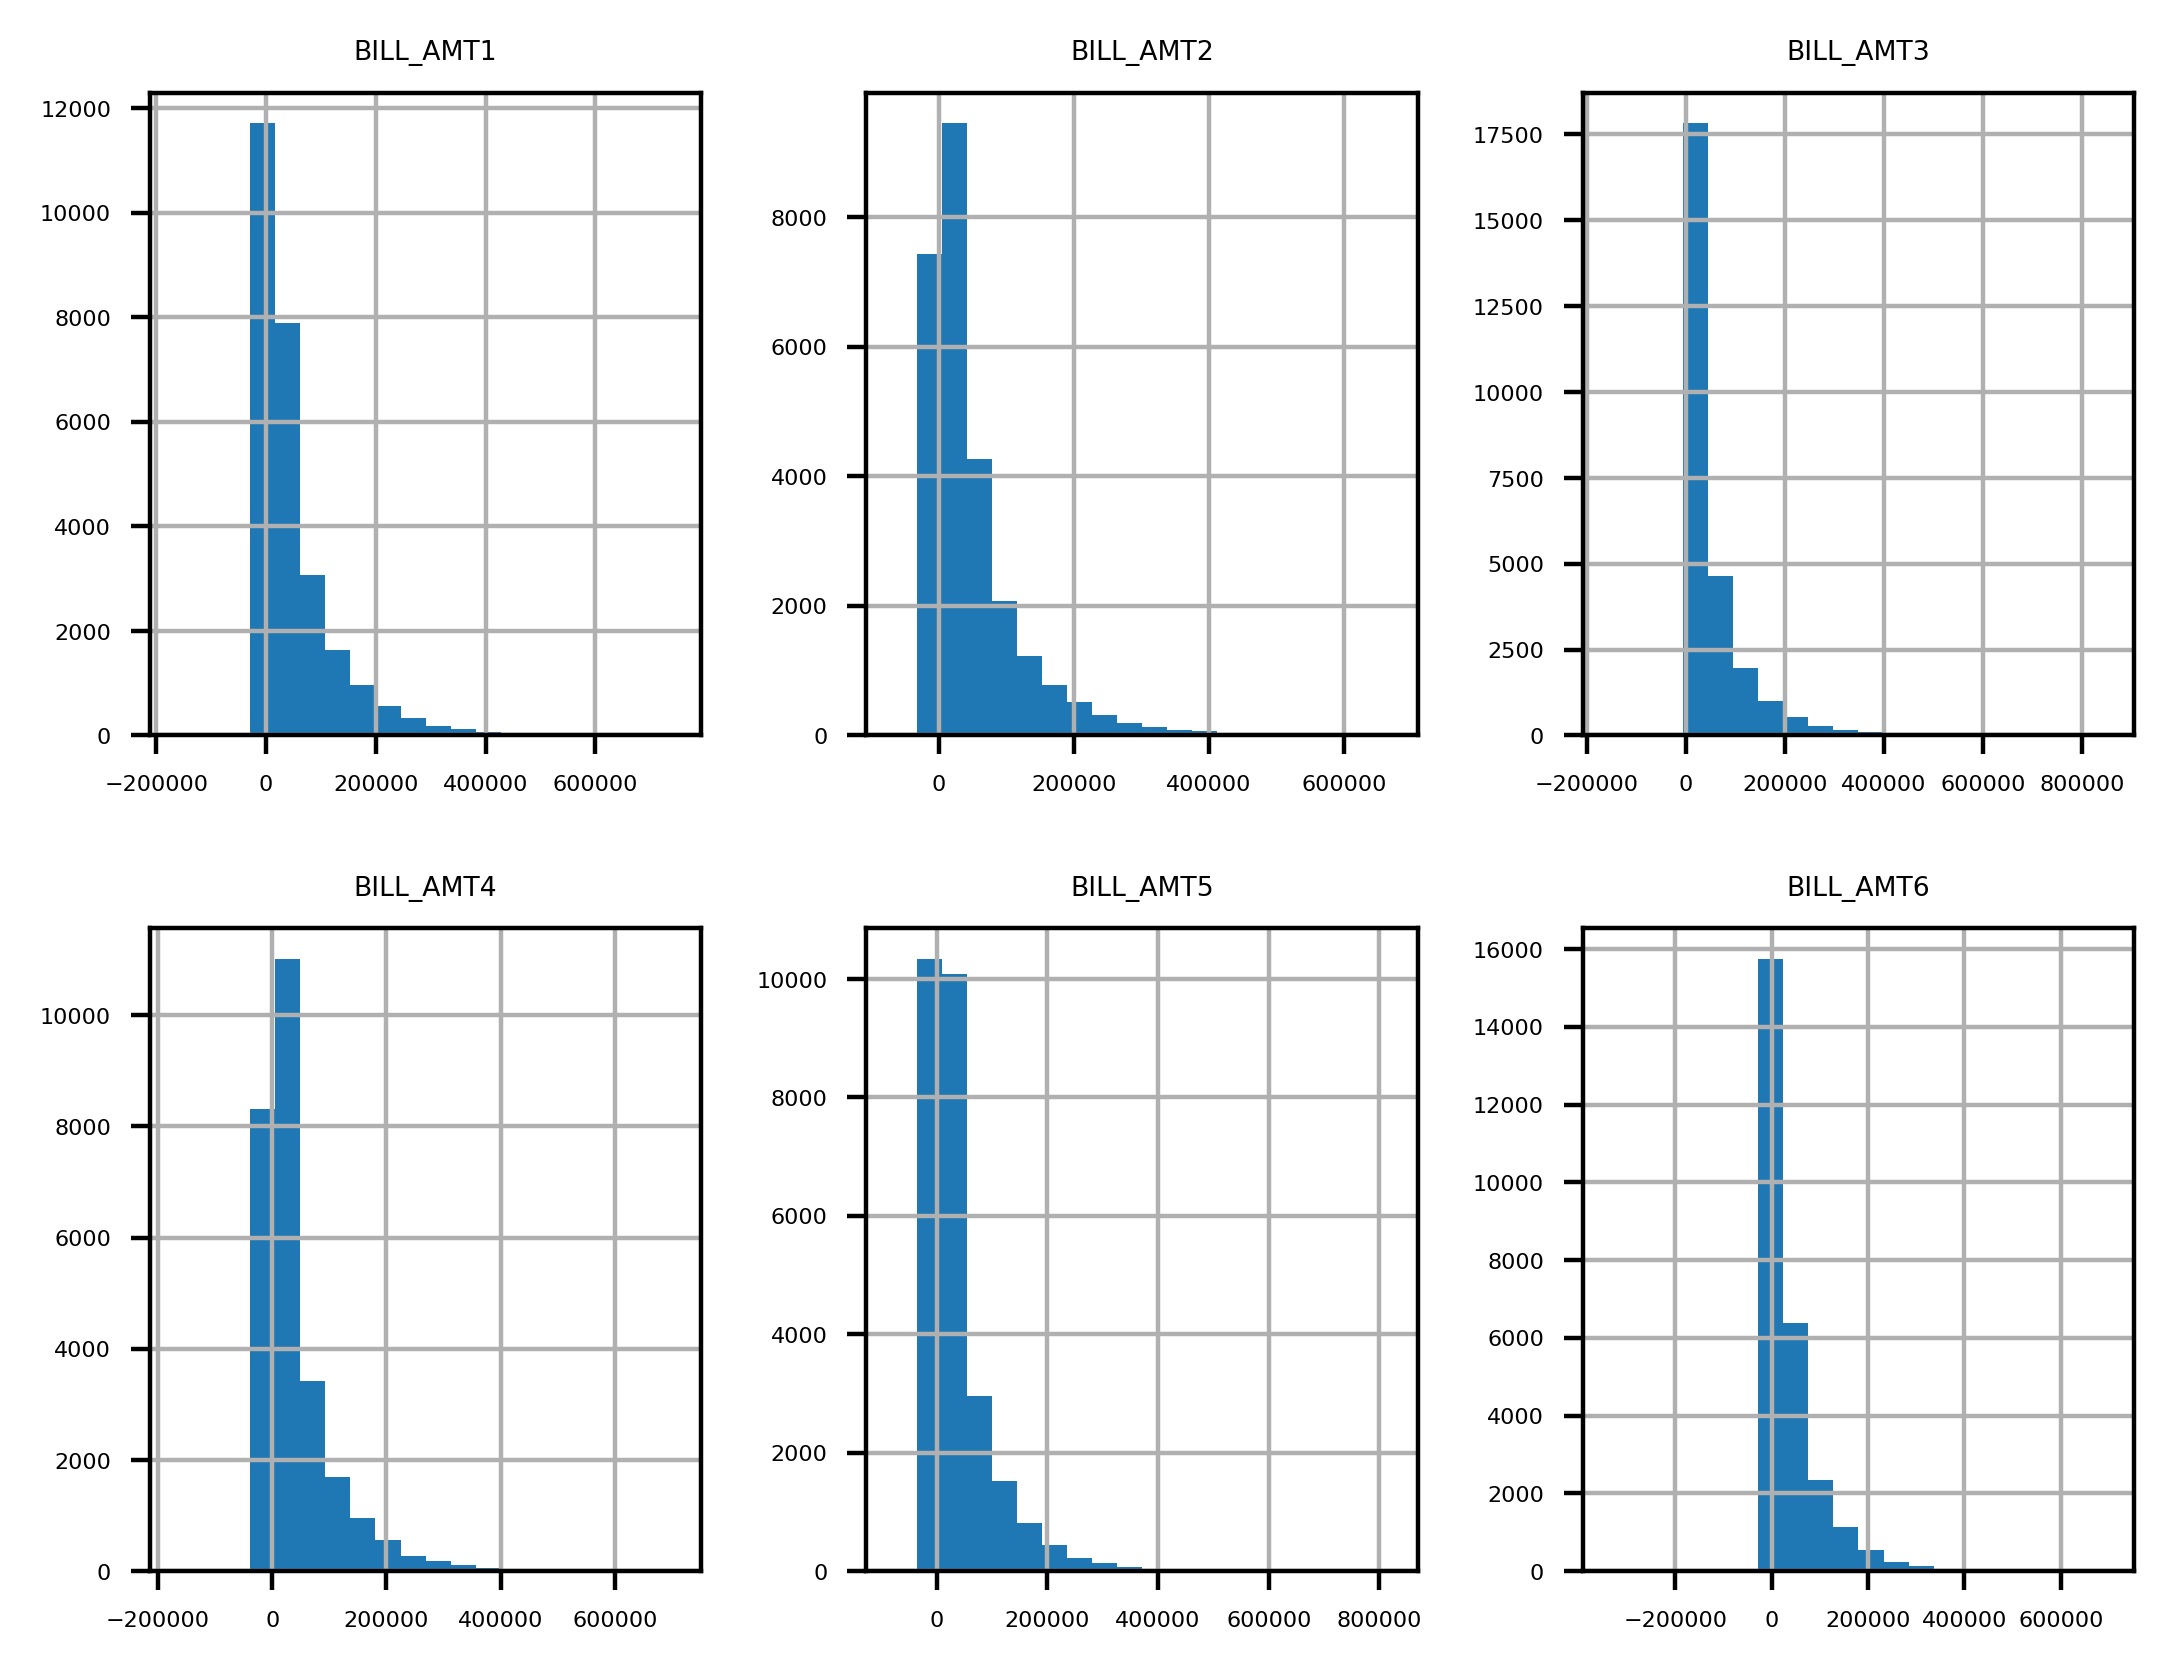

In [117]:
# Histogram of BILL_PAY features
main_df[bill_features].hist(bins=20, layout=(2,3))

We can see that the value frequency in bill_features is between the value of 0 (highest frequency), positive value under 200000, and negative value around 0.

In [118]:
main_df[pay_amt_features].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,26664.000000,2.666400e+04,26664.000000,26664.000000,26664.000000,26664.000000
mean,5704.085771,5.881110e+03,5259.514964,4887.048717,4843.729973,5257.843047
std,16699.398632,2.121431e+04,17265.439561,15956.349371,15311.721795,17635.468185
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1000.000000,8.020000e+02,390.000000,294.750000,242.750000,111.000000
50%,2114.500000,2.007000e+03,1822.000000,1500.000000,1500.000000,1500.000000
75%,5027.000000,5.000000e+03,4556.250000,4050.500000,4082.750000,4015.000000
max,873552.000000,1.227082e+06,889043.000000,621000.000000,426529.000000,528666.000000


When I first gaze the summary, I know this feature is logical, the min value is 0, there is no way pay_amount has negative value. The mean value is quitely similar for each month. Data is widely dispersed because of high value of standard deviation.

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

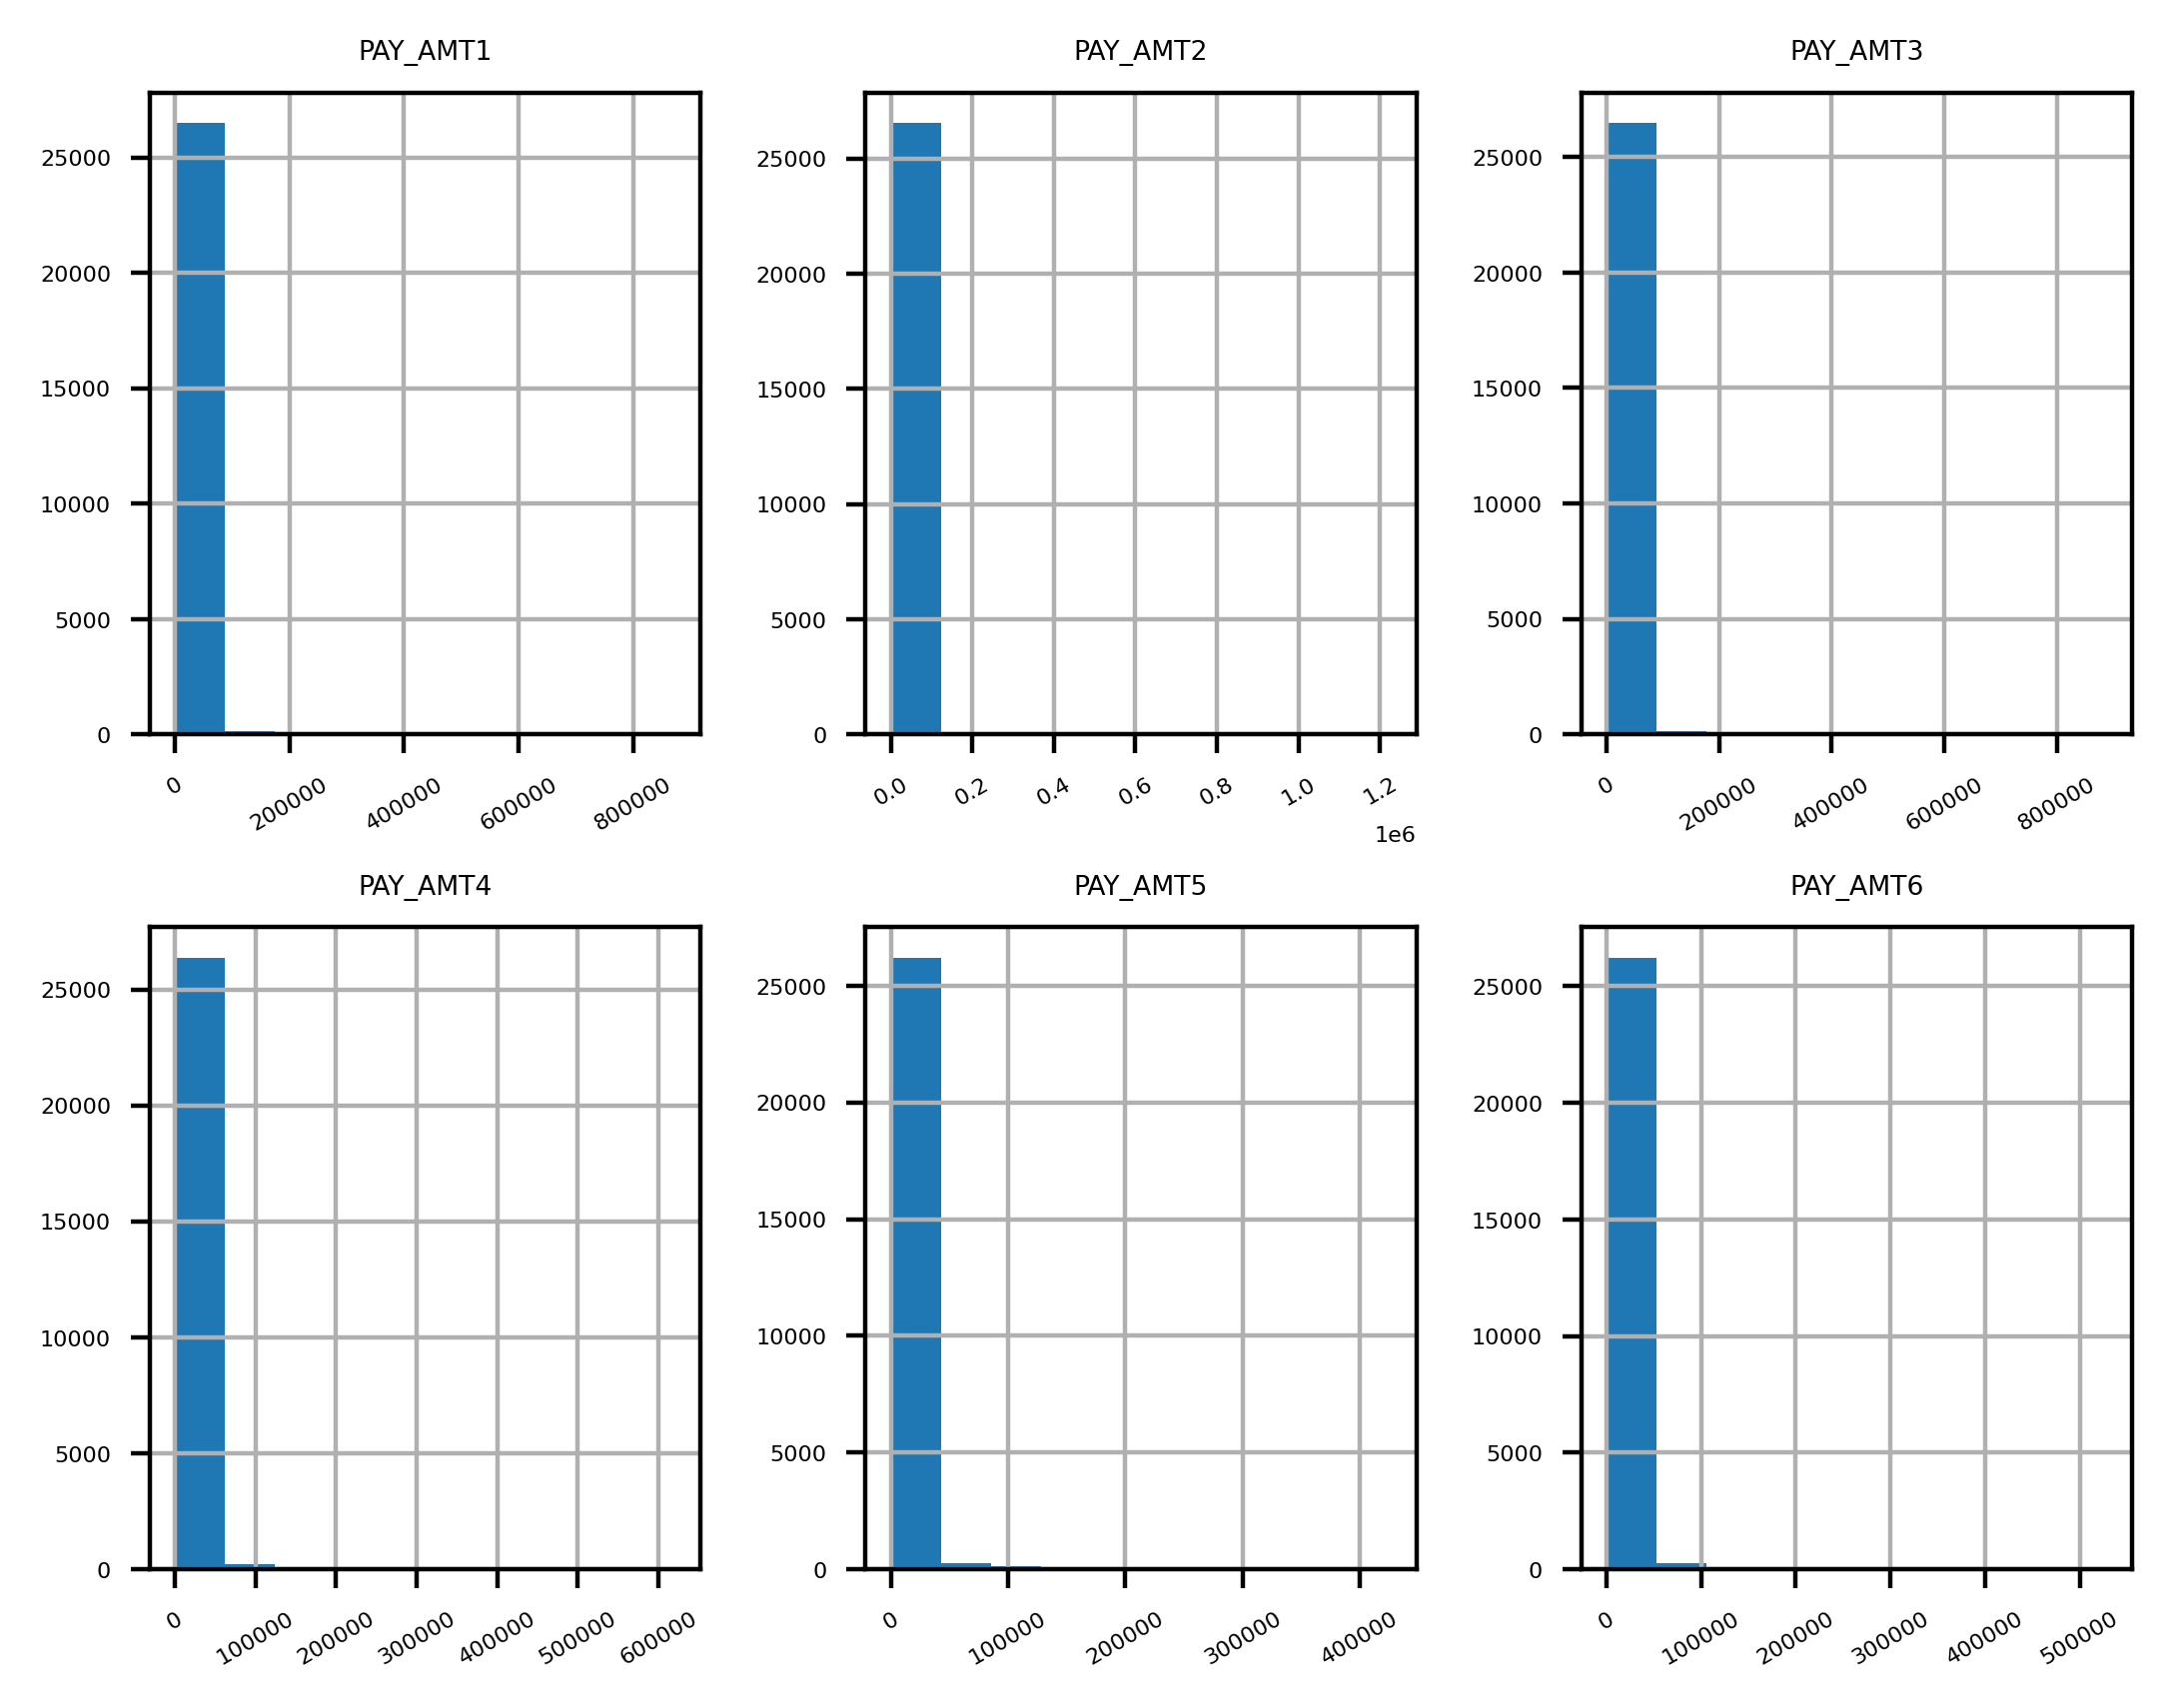

In [119]:
main_df[pay_amt_features].hist(layout=(2,3), xrot=30)

There is so many value in pay_amt_features that have the value of 0 and positive integer near 0 value.

In [120]:
# Check the data that have 0 value in payment_amount_features
pay_amt_0 = main_df[pay_amt_features] == 0

In [121]:
pay_amt_0.head()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,True,False,True,True,True,True
1,True,False,False,False,True,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [122]:
main_df[pay_amt_features].sum()

,0
PAY_AMT1,152093743
PAY_AMT2,156813913
PAY_AMT3,140239707
PAY_AMT4,130308267
PAY_AMT5,129153216
PAY_AMT6,140195127


In [123]:
pay_amt_0.sum()

,0
PAY_AMT1,4656
PAY_AMT2,4833
PAY_AMT3,5293
PAY_AMT4,5697
PAY_AMT5,5981
PAY_AMT6,6373


There is many data that have 0 value in Pay Amount Features, but only a small percentage.

array([[<Axes: title={'center': 'PAY_AMT1'}>,
        <Axes: title={'center': 'PAY_AMT2'}>,
        <Axes: title={'center': 'PAY_AMT3'}>],
       [<Axes: title={'center': 'PAY_AMT4'}>,
        <Axes: title={'center': 'PAY_AMT5'}>,
        <Axes: title={'center': 'PAY_AMT6'}>]], dtype=object)

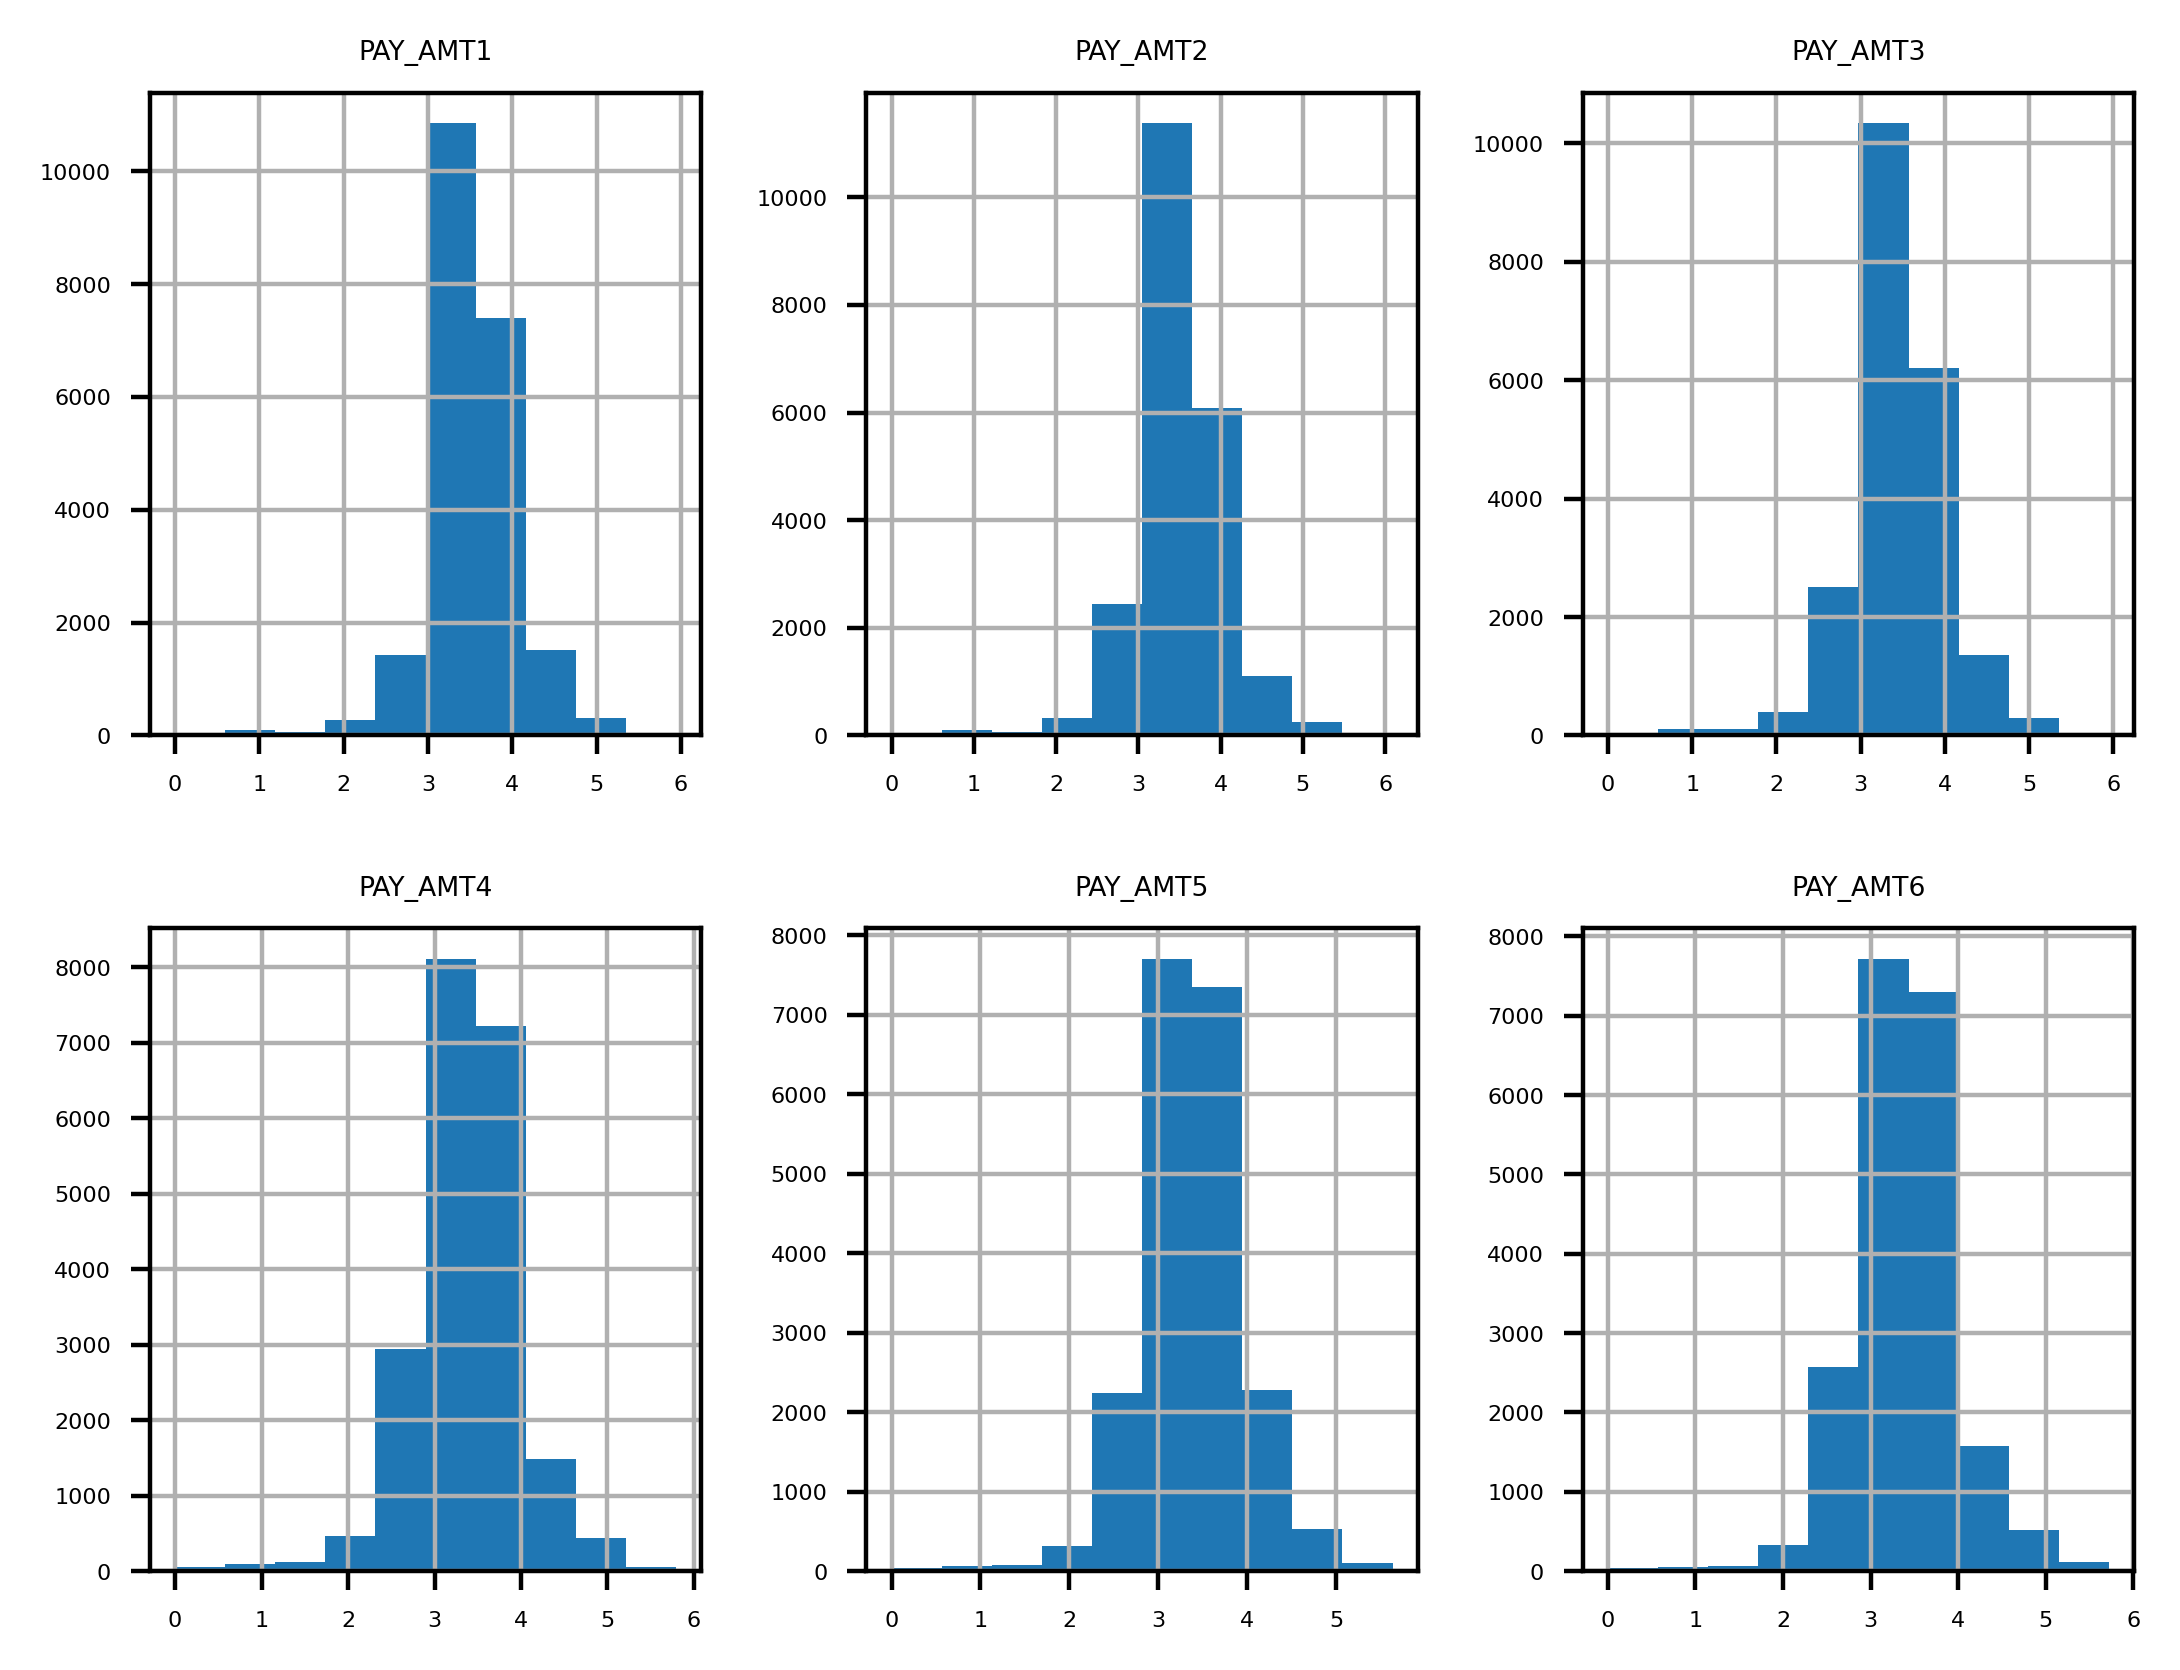

In [124]:
main_df[pay_amt_features][~pay_amt_0].apply(np.log10).hist(layout=(2,3))

Now, we can see much clearer distribution of the data after using log10. This will be used for further statistical analysis.